In [29]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#Read Data
path = "./Resources/loan_data_cleaned.csv"
data = pd.read_csv(path)

#Reseting Index to Loan ID
data.set_index('loan_id')

,Unnamed: 0,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,,
1,0,2,Graduate,No,96000,299000,12,778,24000,176000,227000,80000,Approved
2,1,0,Not Graduate,Yes,41000,122000,8,417,27000,22000,88000,33000,Rejected
3,2,3,Graduate,No,91000,297000,20,506,71000,45000,333000,128000,Rejected
4,3,3,Graduate,No,82000,307000,8,467,182000,33000,233000,79000,Rejected
5,4,5,Not Graduate,Yes,98000,242000,20,382,124000,82000,294000,50000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,4264,5,Graduate,Yes,10000,23000,12,317,28000,5000,33000,8000,Rejected
4266,4265,0,Not Graduate,Yes,33000,113000,20,559,42000,29000,110000,19000,Approved
4267,4266,2,Not Graduate,No,65000,239000,18,457,12000,124000,181000,73000,Rejected


### CATEGORICAL DATA

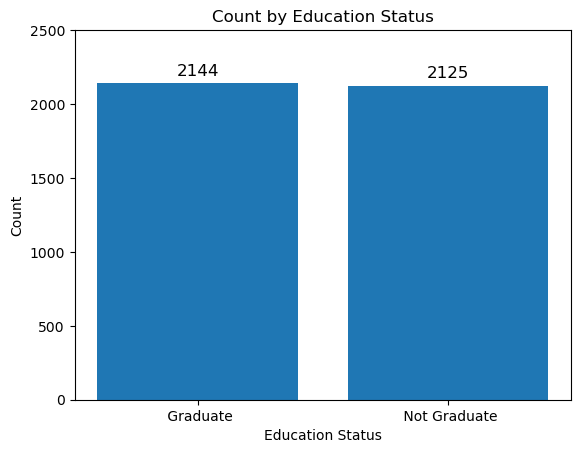

In [95]:
#Graduate Data
fig, ax = plt.subplots()

plot = plt.bar(data[" education"].unique(), data[" education"].value_counts())
for i in range(0,len(data[" education"].unique())):
    ax.text(i, data[" education"].value_counts()[i] + 50, 
            str(data[" education"].value_counts()[i]), 
            ha = 'center', 
            fontsize = 12)

ax.set_ylim([0, 2500])
plt.xlabel("Education Status")
plt.ylabel("Count")
plt.title("Count by Education Status")
plt.show()


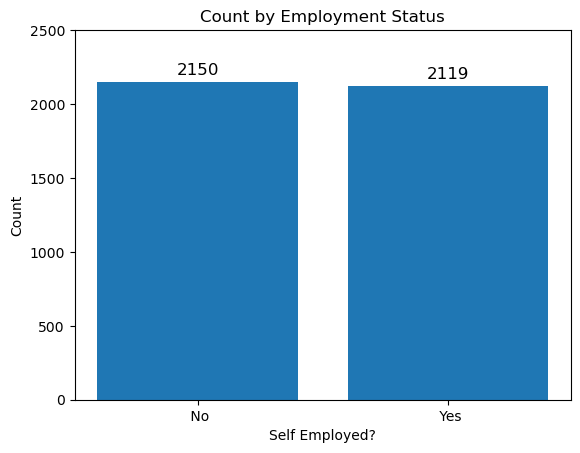

In [92]:
#Employment Data
fig, ax = plt.subplots()

plot = plt.bar(data[" self_employed"].unique(), data[" self_employed"].value_counts())
for i in range(0,len(data[" self_employed"].unique())):
    ax.text(i, data[" self_employed"].value_counts()[i] + 50, 
            str(data[" self_employed"].value_counts()[i]), 
            ha = 'center', 
            fontsize = 12)
ax.set_ylim([0, 2500])
plt.xlabel("Self Employed?")
plt.ylabel("Count")
plt.title("Count by Employment Status")
plt.show()

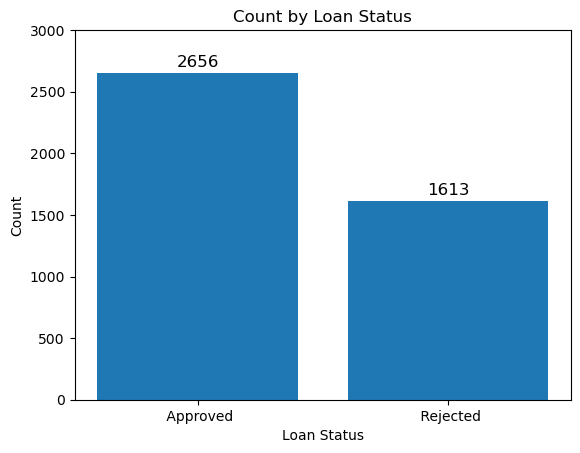

In [101]:
#Loan Status Data
fig, ax = plt.subplots()

plot = plt.bar(data[" loan_status"].unique(), data[" loan_status"].value_counts())
for i in range(0,len(data[" loan_status"].unique())):
    ax.text(i, data[" loan_status"].value_counts()[i] + 50, 
            str(data[" loan_status"].value_counts()[i]), 
            ha = 'center', 
            fontsize = 12)
ax.set_ylim([0, 3000])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Count by Loan Status")
plt.show()

### NUMERICAL DATA

(array([435., 416., 426., 397., 450., 451., 383., 453., 434., 424.]),
 array([ 2000., 11700., 21400., 31100., 40800., 50500., 60200., 69900.,
        79600., 89300., 99000.]),
 <BarContainer object of 10 artists>)

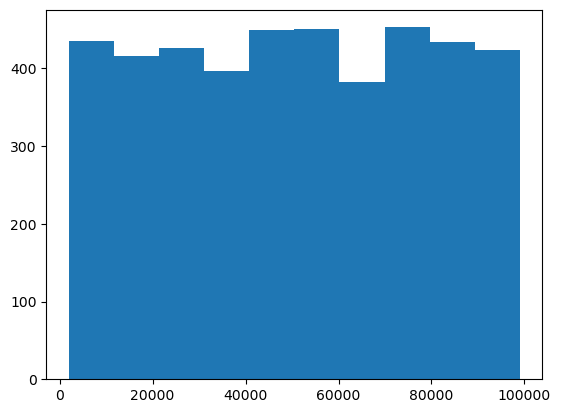

In [102]:
plt.hist(data[" income_annum"])

(array([568., 560., 624., 586., 607., 521., 352., 275., 131.,  45.]),
 array([  3000.,  42200.,  81400., 120600., 159800., 199000., 238200.,
        277400., 316600., 355800., 395000.]),
 <BarContainer object of 10 artists>)

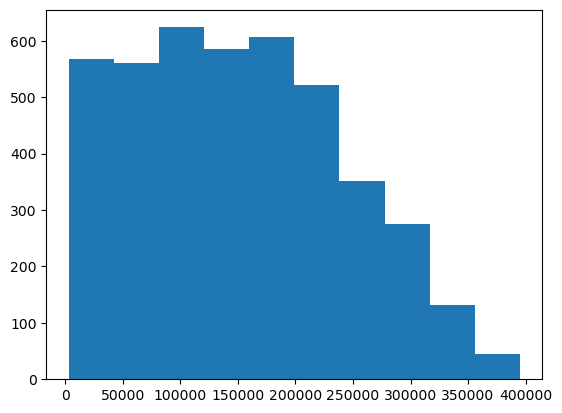

In [105]:
plt.hist(data[" loan_amount"])

(array([404., 447., 490., 386., 436., 456., 405., 412., 422., 411.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

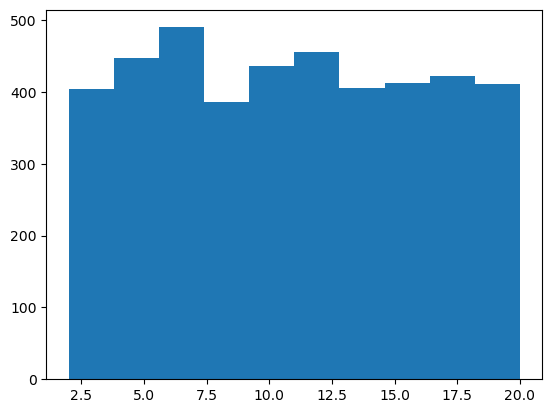

In [106]:
plt.hist(data[" loan_term"])

(array([424., 412., 430., 428., 439., 409., 457., 431., 429., 410.]),
 array([300., 360., 420., 480., 540., 600., 660., 720., 780., 840., 900.]),
 <BarContainer object of 10 artists>)

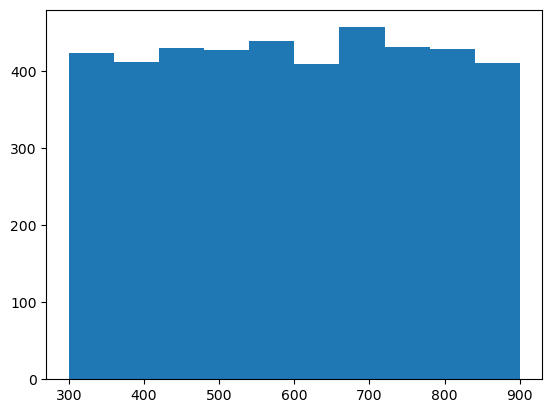

In [107]:
plt.hist(data[" cibil_score"])

(array([1302.,  858.,  596.,  480.,  355.,  266.,  160.,  140.,   88.,
          24.]),
 array([ -1000.,  28200.,  57400.,  86600., 115800., 145000., 174200.,
        203400., 232600., 261800., 291000.]),
 <BarContainer object of 10 artists>)

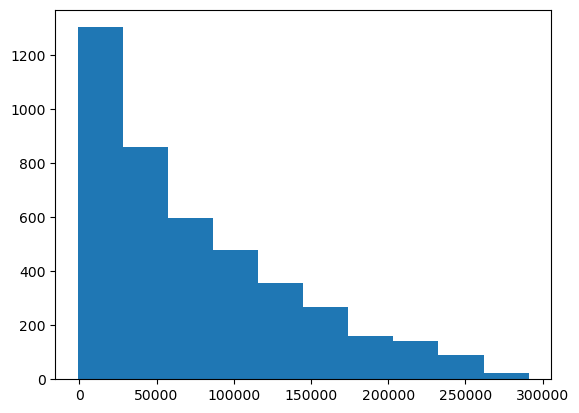

In [108]:
plt.hist(data[" residential_assets_value"])

(array([1376.,  814.,  603.,  426.,  346.,  272.,  192.,  129.,   80.,
          31.]),
 array([     0.,  19400.,  38800.,  58200.,  77600.,  97000., 116400.,
        135800., 155200., 174600., 194000.]),
 <BarContainer object of 10 artists>)

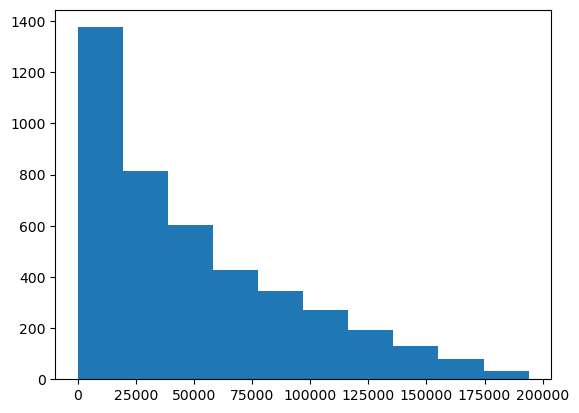

In [109]:
plt.hist(data[" commercial_assets_value"])

(array([557., 589., 579., 611., 574., 535., 383., 234., 144.,  63.]),
 array([  3000.,  41900.,  80800., 119700., 158600., 197500., 236400.,
        275300., 314200., 353100., 392000.]),
 <BarContainer object of 10 artists>)

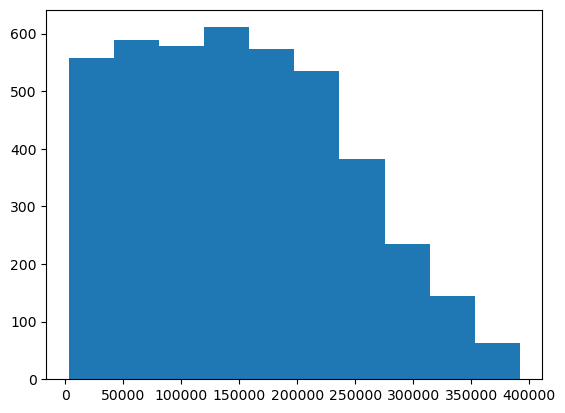

In [110]:
plt.hist(data[" luxury_assets_value"])

(array([655., 695., 722., 666., 549., 378., 264., 201., 104.,  35.]),
 array([     0.,  14700.,  29400.,  44100.,  58800.,  73500.,  88200.,
        102900., 117600., 132300., 147000.]),
 <BarContainer object of 10 artists>)

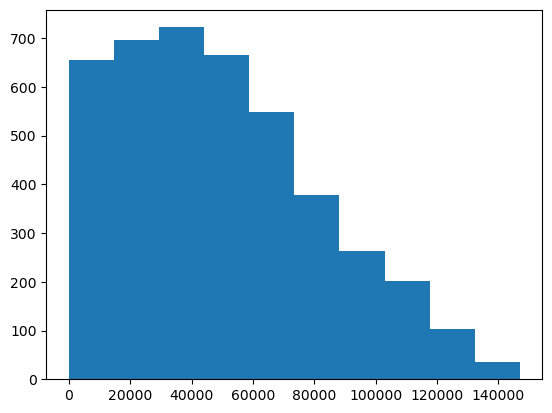

In [111]:
plt.hist(data[" bank_asset_value"])